# Initial Setup (YOLOv12)

In [4]:
# Check for NVIDIA CUDA GPU
!nvidia-smi

# Set {HOME}
import os
HOME = os.getcwd()
print(HOME)

Sun May 11 23:51:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# Check for GPU availability
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Install latest stable version of PyTorch with CUDA or CPU-only
!pip install --quiet torch torchvision torchaudio

# Test import
import torchvision
from torchvision import datasets, models, transforms

Using device: cuda


In [6]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# YOLO Sample Image

In [ ]:
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = f"{HOME}/dog.jpeg"
image = cv2.imread(image_path)

model = YOLO('yolov12l.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

# smdcomponents-xlsmf

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vd6IwKW3GVZBtvpNvbj7")
project = rf.workspace("ece4490").project("smdcomponents-xlsmf")
version = project.version(3)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to smdComponents-3 in yolov12:: 100%|██████████| 10800/10800 [00:01<00:00, 7607.27it/s] 


In [ ]:
# Import YOLO and Train via Dataset
from ultralytics import YOLO
model = YOLO('yolov12n.yaml')

# Edit Epochs & Hyperparameters accordingly
results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=20, # Restricting to 20 Epochs
    lr0=0.002,
    lrf=0.1,
    momentum=0.9,
    weight_decay=0.001,
    warmup_epochs=5.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.05,
    box=0.02,
    cls=0.2,
    iou=0.25,
    hsv_s=0.4,
    mosaic=0.5,
    fliplr=0.3
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.128 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.yaml, data=/content/smdComponents-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, a

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      2368  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2, 1, 2]          
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2, 1, 4]          
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    174720  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 88.0MB/s]


AMP: checks passed ✅


train: Scanning /content/smdComponents-3/train/labels... 4794 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4794/4794 [00:02<00:00, 1984.89it/s]


train: New cache created: /content/smdComponents-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/smdComponents-3/valid/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 1829.37it/s]


val: New cache created: /content/smdComponents-3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.002' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.001), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.91G    0.01076      1.822      3.524         20        640: 100%|██████████| 300/300 [02:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        300       1079      0.437      0.199       0.12     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.87G    0.00677      1.001       2.14         33        640: 100%|██████████| 300/300 [01:58<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

                   all        300       1079      0.685      0.685      0.711      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.86G   0.005756      0.744      1.823        109        640: 100%|██████████| 300/300 [01:56<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        300       1079      0.784      0.649      0.742      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.72G   0.005362     0.6308      1.699         36        640: 100%|██████████| 300/300 [01:56<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]

                   all        300       1079      0.815        0.8      0.885      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.1G   0.005049     0.5681      1.613         27        640: 100%|██████████| 300/300 [01:54<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]

                   all        300       1079      0.768      0.863      0.918      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.87G   0.004894      0.524      1.558         43        640: 100%|██████████| 300/300 [01:55<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

                   all        300       1079      0.886      0.883      0.944      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.86G   0.004713     0.4904      1.505         30        640: 100%|██████████| 300/300 [01:55<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        300       1079        0.9      0.884      0.951      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.74G   0.004637     0.4596      1.492         22        640: 100%|██████████| 300/300 [01:55<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

                   all        300       1079      0.935      0.902      0.972      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.08G   0.004534     0.4471      1.459         49        640: 100%|██████████| 300/300 [01:56<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        300       1079      0.908      0.907      0.952      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.87G   0.004452     0.4291      1.441         46        640: 100%|██████████| 300/300 [01:55<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]

                   all        300       1079      0.899      0.863      0.952      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.88G   0.004375      0.411      1.405         38        640: 100%|██████████| 300/300 [01:56<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.92it/s]

                   all        300       1079      0.932      0.911      0.961      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.74G   0.004323     0.3962      1.399         42        640: 100%|██████████| 300/300 [01:55<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]

                   all        300       1079      0.917       0.94      0.975      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.94G   0.004193       0.38      1.366         35        640: 100%|██████████| 300/300 [01:54<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]

                   all        300       1079      0.947       0.95      0.982      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.89G   0.004209     0.3785      1.371         32        640: 100%|██████████| 300/300 [01:55<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]

                   all        300       1079      0.925      0.927      0.977      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.03G   0.004126      0.362      1.346         60        640: 100%|██████████| 300/300 [01:53<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        300       1079      0.936      0.936      0.983      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.85G   0.004087      0.356      1.343         29        640: 100%|██████████| 300/300 [01:55<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]

                   all        300       1079      0.932      0.923      0.979      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.06G   0.004046     0.3453      1.323         37        640: 100%|██████████| 300/300 [01:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]

                   all        300       1079      0.959      0.954      0.982      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.79G   0.004042     0.3446       1.32         67        640:  98%|█████████▊| 293/300 [01:50<00:02,  2.78it/s]

In [ ]:
# Save a checkpoint BEFORE downloading all data
from google.colab import drive
drive.mount('/content/gdrive')

model_save_name = 'smdcomponents.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
torch.save(model.state_dict(), path)

In [ ]:
# Mount Google Drive and Download all data
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree(
    '/content/runs/detect/train',
    '/content/drive/MyDrive/yolo_train_artifacts/yolov12_smdcomponents-xlsmf_2'
)

# printed-circuit-board-fip9y

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vd6IwKW3GVZBtvpNvbj7")
project = rf.workspace("ece4490").project("printed-circuit-board-fip9y")
version = project.version(2)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Import YOLO and Train via Dataset
from ultralytics import YOLO
model = YOLO('yolov12n.yaml')

# Edit Epochs & Hyperparameters accordingly
results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=55,
    lr0=0.002,
    lrf=0.1,
    momentum=0.9,
    weight_decay=0.001,
    warmup_epochs=5.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.05,
    box=0.02,
    cls=0.2,
    iou=0.25,
    hsv_s=0.4,
    mosaic=0.5,
    fliplr=0.3
)

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.yaml, data=/content/printed-circuit-board-2/data.yaml, epochs=55, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.25, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

train: Scanning /content/printed-circuit-board-2/train/labels... 1644 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1644/1644 [00:01<00:00, 1236.26it/s]

train: WARNING ⚠️ /content/printed-circuit-board-2/train/images/Virtex5_jpg.rf.437ebcd918b01229bb5f3a8eeeacb027.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/printed-circuit-board-2/train/images/Virtex5_jpg.rf.9851164f30971f1a7666e99ebb0b5ef4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/printed-circuit-board-2/train/images/pcb128rec1_jpg.rf.2cf3ea5005c74a6ecdc8388fcd3a9f2e.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/printed-circuit-board-2/train/images/pcb130rec1_jpg.rf.3fffc1532a7297e7f12ecd2fc255a5b8.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/printed-circuit-board-2/train/images/pcb130rec1_jpg.rf.6e1cee9e7aa71a539bc11561b8ba318d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/printed-circuit-board-2/train/images/pcb130rec1_jpg.rf.e29c23e5669cc0a5f2d4cbf2a2fec73d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/printed-circuit-board-2/train/images/pcb99rec1_jpg.rf.bef57c53a461fa8f1baf46dde1475d9e.jpg: 1 dup

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/printed-circuit-board-2/valid/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 419.87it/s]


val: New cache created: /content/printed-circuit-board-2/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.002' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000263, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.001), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 55 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/55      15.3G    0.01176      2.164      4.211       1839        640: 100%|██████████| 103/103 [00:56<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         80      18617          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/55      12.5G    0.01173      2.145      4.136       3325        640: 100%|██████████| 103/103 [00:52<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all         80      18617          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/55      13.2G    0.01158        2.1      3.967       1371        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         80      18617   0.000262   0.000317   0.000148   2.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/55       8.9G    0.01087      1.964      3.618       2065        640: 100%|██████████| 103/103 [00:52<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         80      18617   0.000343    0.00126   0.000217    3.9e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/55      12.3G    0.01019      1.764      3.287       2219        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all         80      18617      0.485      0.002   0.000538   0.000137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/55      12.7G   0.009792      1.559       2.94       2399        640: 100%|██████████| 103/103 [00:51<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all         80      18617      0.243    0.00411   0.000961   0.000227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/55      15.3G   0.009414      1.413      2.564       2112        640: 100%|██████████| 103/103 [00:51<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all         80      18617      0.248    0.00527     0.0022    0.00055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/55      15.3G   0.009164      1.331      2.301       2305        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         80      18617      0.144    0.00574    0.00325   0.000949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/55      12.2G   0.008985      1.289      2.172       2598        640: 100%|██████████| 103/103 [00:51<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all         80      18617      0.145     0.0088    0.00457    0.00138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/55      11.1G    0.00884      1.253      2.062       2349        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all         80      18617    0.00485     0.0155     0.0054    0.00168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/55      13.8G   0.008764      1.239      2.009       1861        640: 100%|██████████| 103/103 [00:50<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all         80      18617    0.00617     0.0181    0.00653     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/55      12.9G   0.008643       1.22      1.968       2645        640: 100%|██████████| 103/103 [00:51<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all         80      18617     0.0397     0.0292     0.0261     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/55      11.5G    0.00855       1.21      1.927       1839        640: 100%|██████████| 103/103 [00:50<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all         80      18617     0.0423     0.0208    0.00868      0.003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/55      14.7G   0.008441      1.194      1.881       2718        640: 100%|██████████| 103/103 [00:50<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all         80      18617    0.00978     0.0208    0.00929    0.00281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/55      10.4G   0.008343      1.177      1.849       2345        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         80      18617     0.0148     0.0245     0.0129    0.00399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/55      11.3G   0.008257      1.165      1.811       2555        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]

                   all         80      18617     0.0126     0.0263     0.0125    0.00398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/55      13.3G   0.008177      1.157      1.805       3542        640: 100%|██████████| 103/103 [00:50<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]

                   all         80      18617     0.0146     0.0296     0.0141    0.00444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/55      8.68G   0.008177      1.154      1.788       3206        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]

                   all         80      18617     0.0191     0.0352     0.0173    0.00538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/55      9.45G   0.008077      1.144      1.751       1826        640: 100%|██████████| 103/103 [00:51<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]

                   all         80      18617     0.0189     0.0387     0.0178    0.00581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/55      10.9G   0.007964      1.132      1.732       1369        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]

                   all         80      18617     0.0177     0.0435     0.0186    0.00687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/55      13.2G   0.007946      1.128      1.728       1881        640: 100%|██████████| 103/103 [00:50<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]

                   all         80      18617     0.0195     0.0455     0.0201    0.00684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/55      9.09G   0.007926      1.123      1.714       2338        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]

                   all         80      18617     0.0235     0.0487     0.0235    0.00802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/55      13.3G   0.007901       1.11        1.7       2741        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all         80      18617     0.0203     0.0481     0.0229    0.00759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/55      8.67G   0.007841      1.105      1.683       2551        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all         80      18617     0.0226     0.0542     0.0252    0.00916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/55      11.6G   0.007799      1.092      1.673       1615        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]

                   all         80      18617     0.0231     0.0568      0.026    0.00969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/55      9.34G   0.007768      1.091      1.667       1987        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all         80      18617     0.0267     0.0646     0.0299     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/55      14.5G   0.007696      1.083      1.647       2298        640: 100%|██████████| 103/103 [00:50<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]

                   all         80      18617     0.0272     0.0685     0.0294     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/55      13.9G   0.007714       1.08      1.637       1669        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]

                   all         80      18617     0.0193     0.0606     0.0251    0.00897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/55       8.5G   0.007664      1.073      1.642       1387        640: 100%|██████████| 103/103 [00:50<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all         80      18617     0.0231     0.0678     0.0297     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/55      14.3G   0.007599      1.066      1.623       2862        640: 100%|██████████| 103/103 [00:50<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]

                   all         80      18617     0.0283     0.0769     0.0328     0.0115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/55      8.83G   0.007588      1.055      1.614       2225        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all         80      18617      0.181     0.0713     0.0382     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/55        13G    0.00754      1.051      1.618       1920        640: 100%|██████████| 103/103 [00:51<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

                   all         80      18617      0.168      0.074     0.0321     0.0114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/55      13.2G   0.007545      1.046      1.603       2764        640: 100%|██████████| 103/103 [00:51<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all         80      18617     0.0311     0.0769     0.0355     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/55      13.1G   0.007499      1.044      1.607       3056        640: 100%|██████████| 103/103 [00:50<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all         80      18617     0.0334     0.0844      0.038     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/55        14G   0.007491      1.041      1.597       2652        640: 100%|██████████| 103/103 [00:50<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]

                   all         80      18617     0.0312     0.0782     0.0369     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/55      14.8G   0.007459      1.031      1.581       2507        640: 100%|██████████| 103/103 [00:50<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all         80      18617     0.0352     0.0829     0.0383     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/55      9.01G   0.007377      1.028      1.582       1648        640: 100%|██████████| 103/103 [00:51<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]

                   all         80      18617     0.0378     0.0782      0.041     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/55      7.88G   0.007408      1.025      1.576       2660        640: 100%|██████████| 103/103 [00:51<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all         80      18617      0.031     0.0808     0.0367     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/55      13.5G   0.007418       1.02      1.568       2136        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all         80      18617      0.195     0.0704     0.0409     0.0146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/55      12.2G   0.007399      1.014      1.571       2994        640: 100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all         80      18617     0.0352     0.0834     0.0421     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/55      9.86G   0.007366      1.007      1.561       1589        640: 100%|██████████| 103/103 [00:50<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]

                   all         80      18617     0.0382     0.0798     0.0436     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/55      14.7G   0.007363      1.013      1.561       2305        640: 100%|██████████| 103/103 [00:50<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all         80      18617      0.226     0.0693     0.0398     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/55      10.7G   0.007322      1.009      1.559       3004        640: 100%|██████████| 103/103 [00:51<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all         80      18617     0.0329      0.093     0.0381     0.0153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/55      14.3G   0.007355      1.006      1.554       3390        640: 100%|██████████| 103/103 [00:50<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all         80      18617     0.0434     0.0937     0.0475     0.0223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/55      11.2G   0.007309     0.9931      1.544       2559        640: 100%|██████████| 103/103 [00:52<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all         80      18617     0.0379     0.0904      0.043     0.0189


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/55      11.4G    0.00723     0.9986      1.542       2280        640: 100%|██████████| 103/103 [00:52<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]

                   all         80      18617     0.0392      0.101     0.0482     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/55      12.4G   0.007195     0.9877      1.527       2756        640: 100%|██████████| 103/103 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all         80      18617     0.0428      0.112     0.0543     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/55        13G   0.007212     0.9881      1.532       1529        640: 100%|██████████| 103/103 [00:48<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all         80      18617     0.0441      0.106     0.0475     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/55      7.86G   0.007169       0.98      1.526       2072        640: 100%|██████████| 103/103 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all         80      18617     0.0435      0.117     0.0509     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/55      11.8G   0.007173     0.9791      1.527       1738        640: 100%|██████████| 103/103 [00:48<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all         80      18617     0.0452      0.115     0.0509      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/55      13.1G   0.007164      0.982      1.524       1620        640: 100%|██████████| 103/103 [00:48<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]

                   all         80      18617     0.0474      0.107     0.0507     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/55      10.5G   0.007159     0.9735      1.518       2185        640: 100%|██████████| 103/103 [00:48<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         80      18617     0.0451      0.106     0.0489     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/55      10.1G   0.007106     0.9688      1.512       1970        640: 100%|██████████| 103/103 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         80      18617     0.0446      0.114     0.0468     0.0215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/55      11.1G   0.007133     0.9736      1.515       1295        640: 100%|██████████| 103/103 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all         80      18617     0.0477      0.118     0.0497     0.0224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/55      9.74G   0.007114      0.969      1.521       2107        640: 100%|██████████| 103/103 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all         80      18617     0.0473      0.119     0.0501     0.0224



55 epochs completed in 0.849 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 376 layers, 2,514,974 parameters, 0 gradients, 5.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.06s/it]


                   all         80      18617     0.0426      0.112     0.0543      0.024
                Button         12         60      0.296        0.4      0.272      0.139
             Capacitor         40       3631     0.0804     0.0587     0.0459     0.0187
      Capacitor Jumper         40       3630     0.0515     0.0992     0.0364     0.0132
                 Clock          6         10     0.0351        0.4      0.302      0.134
             Connector         66        714     0.0939       0.38       0.13      0.041
                 Diode         14         26          0          0          0          0
               Display          2          2          0          0          0          0
                    EM          8         38          0          0          0          0
Electrolytic Capacitor         12        166      0.154        0.5      0.214      0.107
          Ferrite Bead          2          2          0          0          0          0
                  Fus

In [ ]:
# Save a checkpoint BEFORE downloading all data
from google.colab import drive
drive.mount('/content/gdrive')

model_save_name = 'printed-circuit-board.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
torch.save(model.state_dict(), path)

In [ ]:
# Mount Google Drive and Download all data
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree(
    '/content/runs/detect/train',
    '/content/drive/MyDrive/yolo_train_artifacts/yolov12_printed-circuit-board-fip9y_2'
)

# pcb-electronic-components-yalh6

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vd6IwKW3GVZBtvpNvbj7")
project = rf.workspace("ece4490").project("pcb-electronic-components-yalh6")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
# Import YOLO and Train via Dataset
from ultralytics import YOLO
model = YOLO('yolov12n.yaml')

# Edit Epochs & Hyperparameters accordingly
results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=20, # Restricting to 20 Epochs
    imgsz=640,
    lr0=0.001,
    lrf=0.01,
    weight_decay=0.0001,
    warmup_epochs=3.0,
    warmup_bias_lr=0.1,
    # Loss balance: reduce background dominance
    cls=0.6,       # classification loss
    box=0.05,      # bounding box loss
    iou=0.3,       # IoU threshold for positive samples
    # Augmentations (mild to avoid destroying small parts)
    mosaic=0.3,
    mixup=0.0,
    hsv_h=0.015,
    hsv_s=0.5,
    hsv_v=0.4,
    translate=0.05,
    scale=0.3,
    fliplr=0.3
)

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.yaml, data=/content/PCB-Electronic-components-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.3, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning /content/PCB-Electronic-components-1/train/labels... 3014 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3014/3014 [00:06<00:00, 474.25it/s]


train: New cache created: /content/PCB-Electronic-components-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/PCB-Electronic-components-1/valid/labels... 429 images, 0 backgrounds, 0 corrupt: 100%|██████████| 429/429 [00:02<00:00, 204.78it/s]


val: New cache created: /content/PCB-Electronic-components-1/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000435, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0001), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      13.4G     0.0318       6.47      4.139       1123        640: 100%|██████████| 189/189 [04:07<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all        429      32654          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.2G    0.02821      5.533      3.378        735        640: 100%|██████████| 189/189 [03:59<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.16it/s]


                   all        429      32654      0.582    0.00397   0.000869   0.000192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.2G    0.02334      3.911      2.403        456        640: 100%|██████████| 189/189 [04:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.17it/s]


                   all        429      32654      0.239     0.0138    0.00828    0.00233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      11.6G    0.02103      3.418      2.021        237        640: 100%|██████████| 189/189 [03:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.18it/s]

                   all        429      32654      0.243      0.023     0.0163    0.00455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.6G    0.01927      3.155      1.833        501        640: 100%|██████████| 189/189 [04:05<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.18it/s]

                   all        429      32654      0.254     0.0349     0.0275    0.00999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      10.6G    0.01826      2.986      1.713        222        640: 100%|██████████| 189/189 [03:58<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.15it/s]

                   all        429      32654      0.312     0.0412     0.0336     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.1G    0.01743      2.868       1.64        153        640: 100%|██████████| 189/189 [04:07<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all        429      32654      0.277     0.0502     0.0425     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      10.4G    0.01699        2.8       1.59        328        640: 100%|██████████| 189/189 [03:57<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all        429      32654      0.324      0.061      0.043     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.6G    0.01655      2.735      1.554        295        640: 100%|██████████| 189/189 [03:54<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all        429      32654      0.271     0.0585     0.0458     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      13.3G    0.01626      2.676      1.524        751        640: 100%|██████████| 189/189 [03:53<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.12it/s]

                   all        429      32654      0.236     0.0592      0.048     0.0227


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.9G     0.0158      2.627      1.496        254        640: 100%|██████████| 189/189 [02:38<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all        429      32654      0.324     0.0668     0.0515     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      10.6G    0.01558       2.56       1.47        580        640: 100%|██████████| 189/189 [02:33<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]


                   all        429      32654      0.225     0.0666     0.0545     0.0263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      13.3G    0.01536      2.494      1.449        460        640: 100%|██████████| 189/189 [02:35<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.34it/s]

                   all        429      32654      0.224     0.0674     0.0543     0.0268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.6G    0.01529      2.466      1.439        392        640: 100%|██████████| 189/189 [02:34<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]

                   all        429      32654      0.246      0.075     0.0597     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       9.6G    0.01508      2.409      1.422        216        640: 100%|██████████| 189/189 [02:33<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]

                   all        429      32654      0.241     0.0709     0.0614     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      10.8G    0.01495       2.39      1.414        404        640: 100%|██████████| 189/189 [02:33<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]


                   all        429      32654      0.241     0.0792     0.0661     0.0341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.12G    0.01489      2.357      1.406        331        640: 100%|██████████| 189/189 [02:32<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.33it/s]

                   all        429      32654      0.247     0.0778     0.0655     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      10.1G    0.01479      2.327      1.399       1042        640: 100%|██████████| 189/189 [02:30<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.37it/s]


                   all        429      32654      0.255     0.0829     0.0733     0.0388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20        13G     0.0147      2.306      1.393        687        640: 100%|██████████| 189/189 [02:30<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.33it/s]

                   all        429      32654      0.253     0.0794     0.0733     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      9.41G    0.01474      2.298      1.389         90        640: 100%|██████████| 189/189 [02:30<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.33it/s]


                   all        429      32654      0.252     0.0838     0.0748     0.0395

20 epochs completed in 1.166 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.4MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 376 layers, 2,512,049 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.34s/it]


                   all        429      32654      0.251     0.0838     0.0747     0.0394
                Button          4         22          0          0          0          0
             Capacitor        367      14473      0.614      0.264       0.29      0.119
                 Clock          8         12          0          0          0          0
             Connector         77        563      0.252     0.0178     0.0474     0.0151
                 Diode          4         18          0          0          0          0
                    EM          2          3          0          0          0          0
          Ferrite Bead          3         11          0          0          0          0
                    IC        404       5654      0.546      0.627      0.605      0.302
              Inductor        164        333          1          0     0.0128    0.00655
                Jumper          5         12          0          0          0          0
                   Le

In [ ]:
# Save a checkpoint BEFORE downloading all data
from google.colab import drive
drive.mount('/content/gdrive')

import torch
model_save_name = 'pcb-electronic-components.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
torch.save(model.state_dict(), path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Mount Google Drive and Download all data
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree(
    '/content/runs/detect/train',
    '/content/drive/MyDrive/yolo_train_artifacts/yolov12_pcb-electronic-components-yalh6_2'
)

# Note that you will need to get a Google Sharable Link to the model to redownload it.

# Reimport Model Checkpoint (If Needed)

In [ ]:
# Installation
!pip install gdown==3.6.0

  Preparing metadata (setup.py) ... done
  Created wheel for gdown: filename=gdown-3.6.0-py3-none-any.whl size=5222 sha256=905d1f3e8ba80e94825a0612ccba512c47a5c814d8a70f698c6d22a47f224c2e
  Stored in directory: /root/.cache/pip/wheels/03/8b/6a/a06e3ae39750cb1fd26b797c0dbe236243b037bd864fc775fc
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [ ]:
# Use Google Sharable Link ID here:
my_file_id = "10Tk0ZF_6-EhayyoF80OClqFCF0b-HPGS"

# Download via Google Sharable Link with ID:
!gdown https://drive.google.com/uc?id={my_file_id}

Downloading...
From: https://drive.google.com/uc?id=10Tk0ZF_6-EhayyoF80OClqFCF0b-HPGS
To: /content/best.pt
100% 5.44M/5.44M [00:00<00:00, 94.6MB/s]


# Display Data from Dataset

In [4]:
# Install dependencies
!pip install pandas

Display all files in '/train/'

In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml  events.out.tfevents.1747002477.c2ecee64696a.584.0  weights


Display Confusion Matrix:

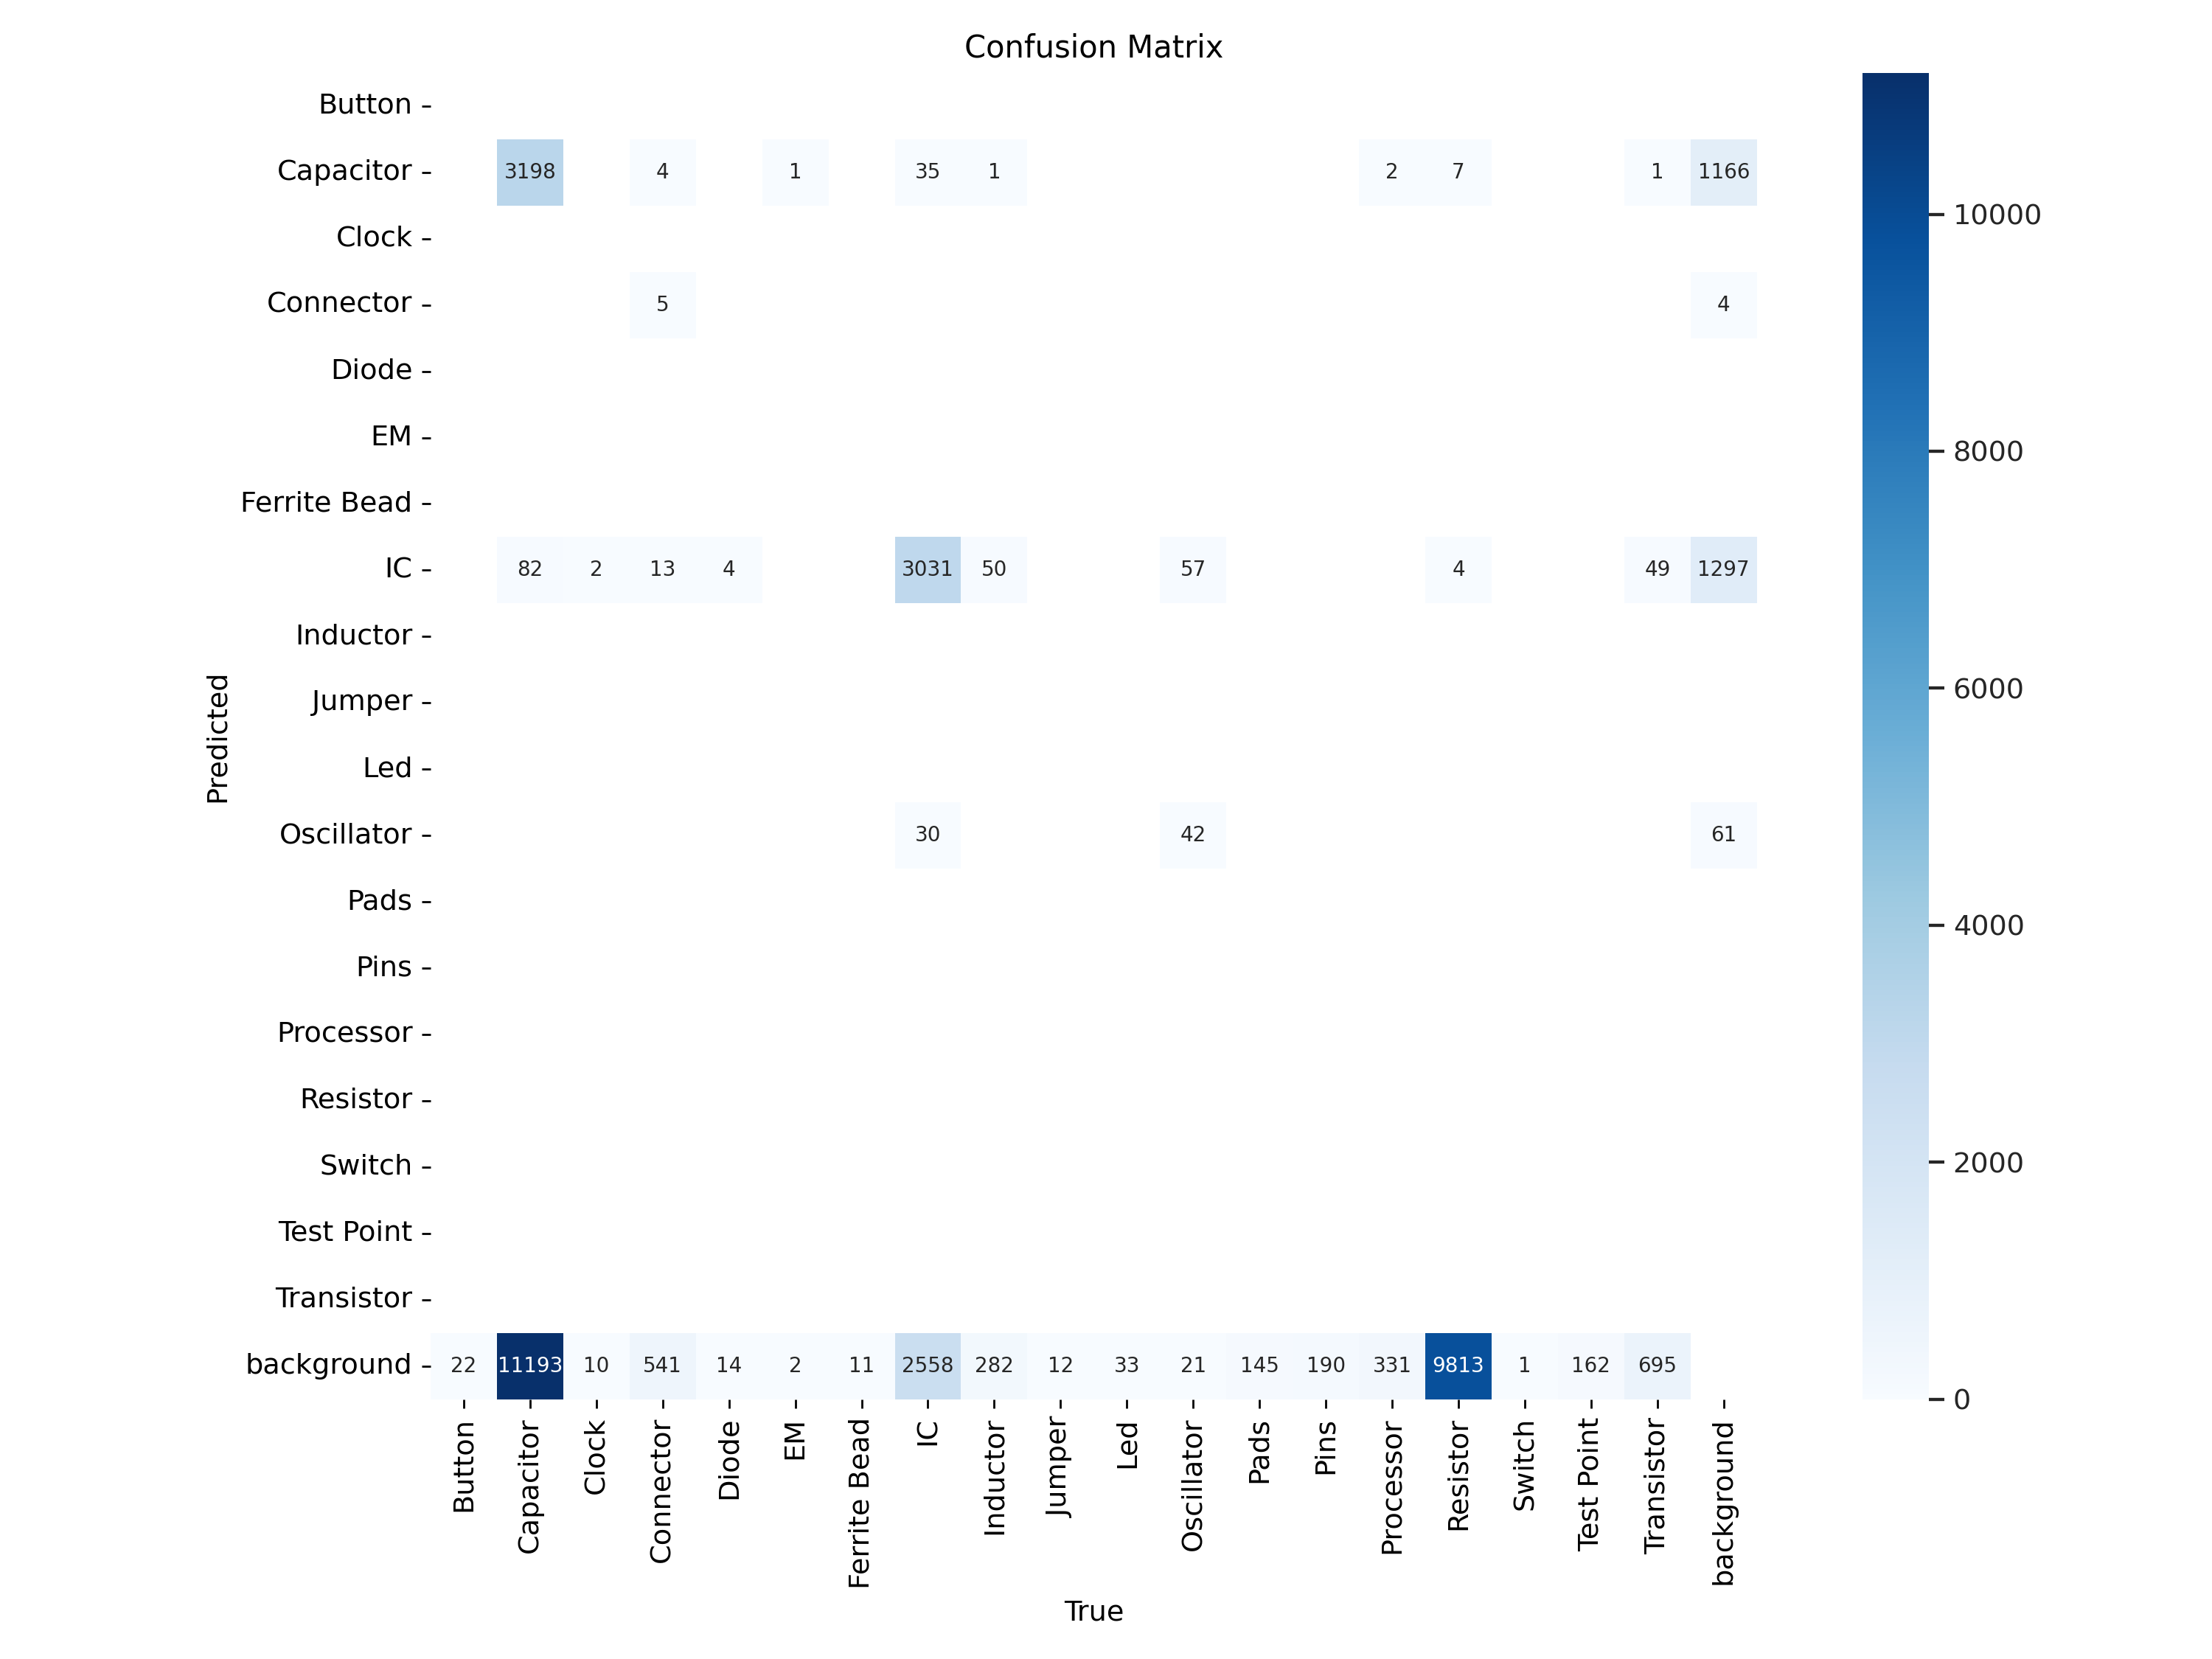

In [11]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

Display Loss Graphs:

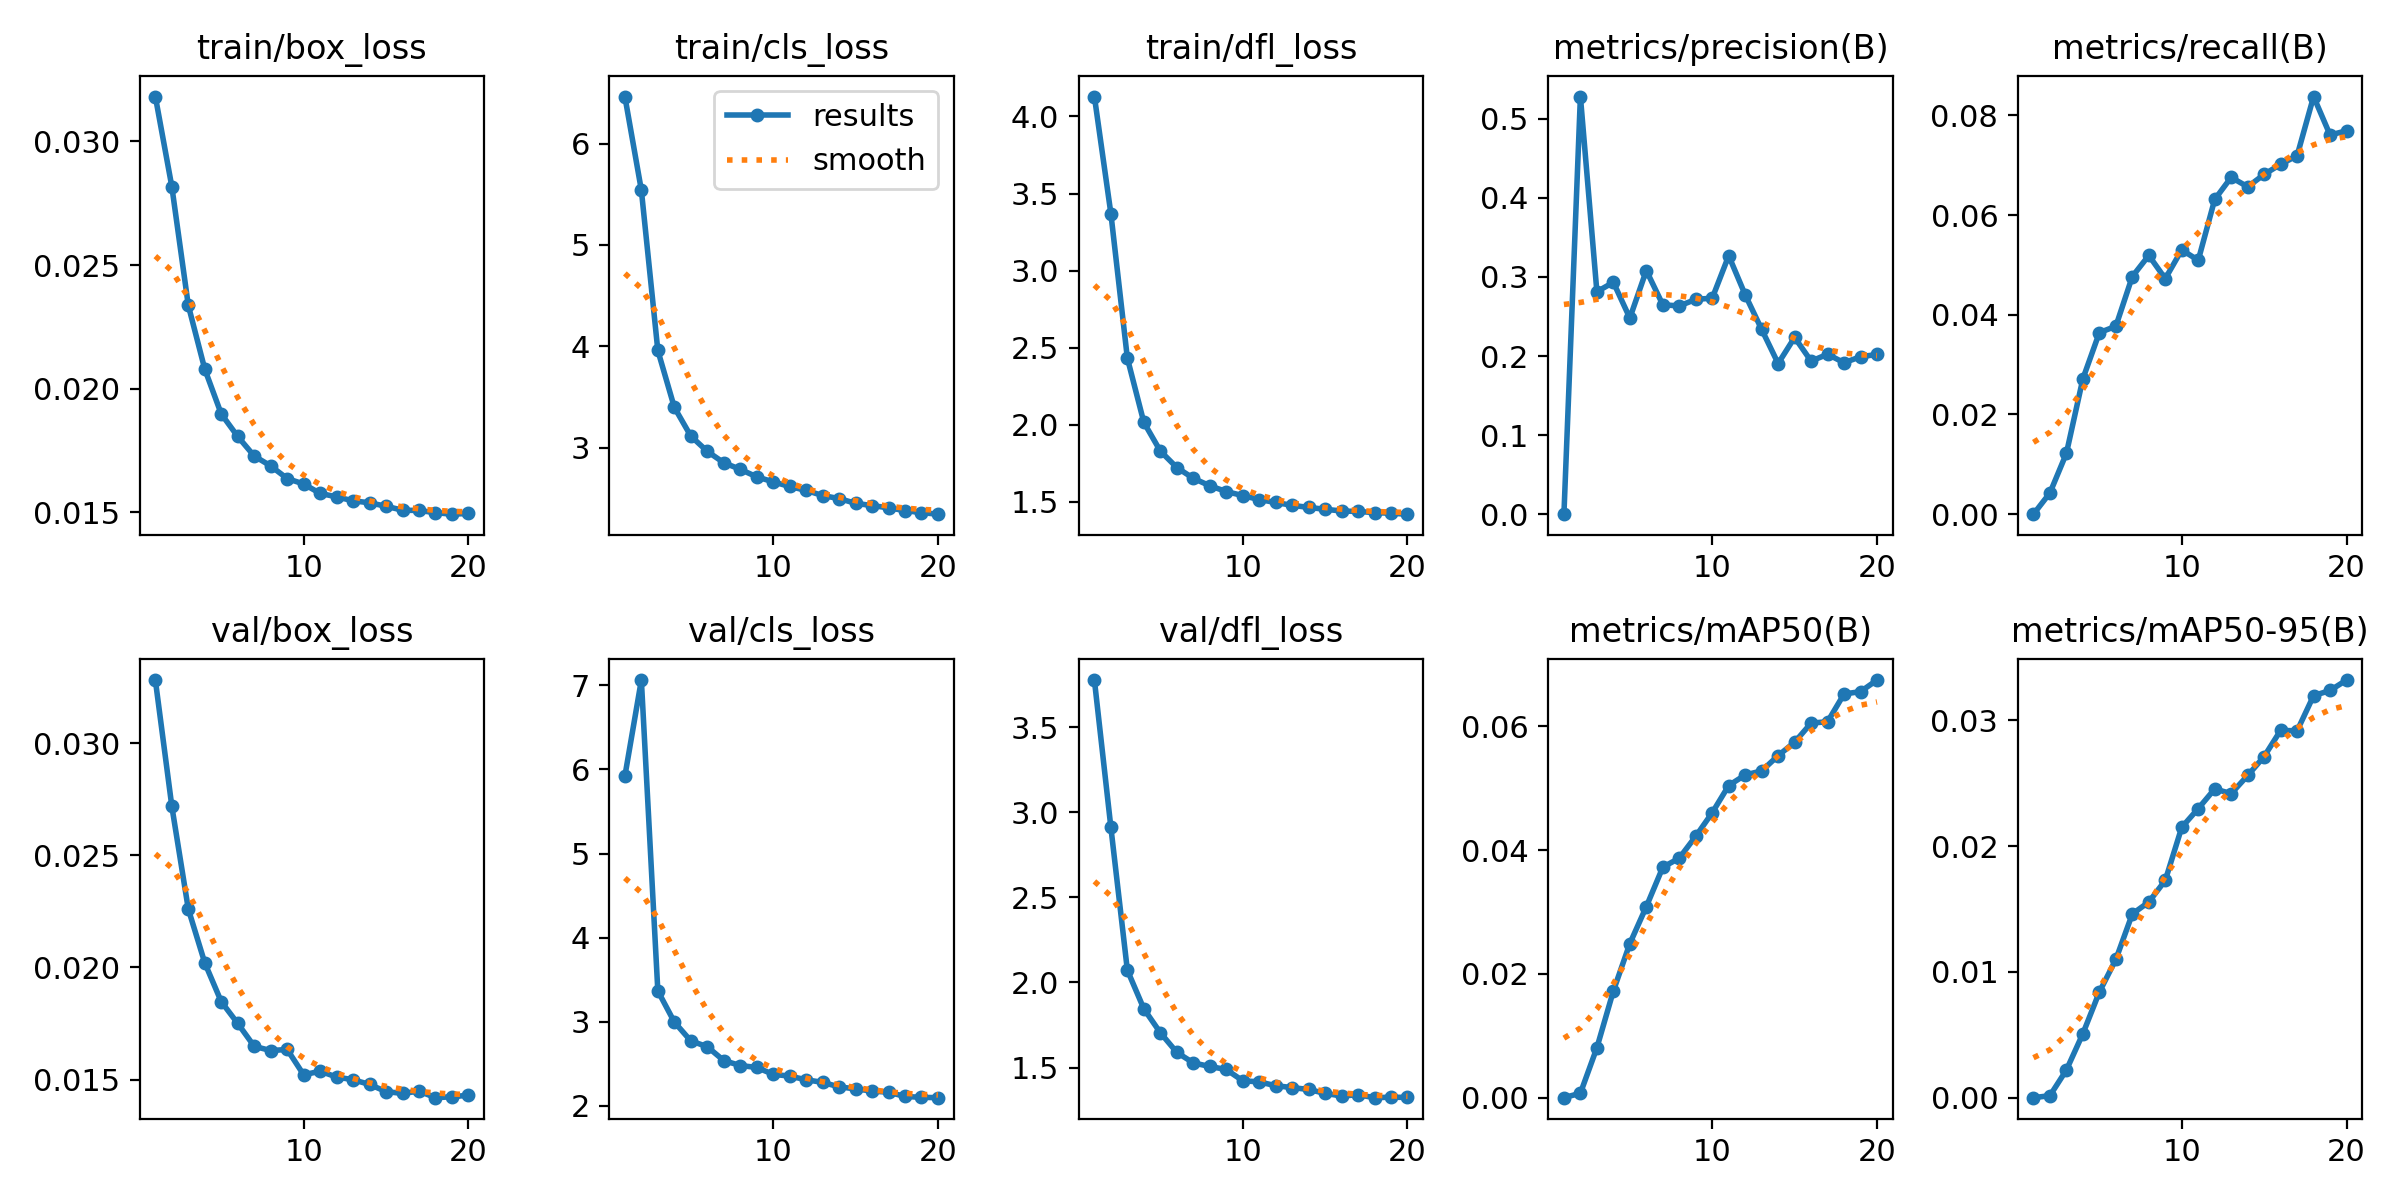

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

Display Classes:

In [9]:
!pip install -q supervision

import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['Button',
 'Capacitor',
 'Clock',
 'Connector',
 'Diode',
 'EM',
 'Ferrite Bead',
 'IC',
 'Inductor',
 'Jumper',
 'Led',
 'Oscillator',
 'Pads',
 'Pins',
 'Processor',
 'Resistor',
 'Switch',
 'Test Point',
 'Transistor']

Calculate Mean Average:

In [1]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


NameError: name 'HOME' is not defined

In [11]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

AttributeError: type object 'map' has no attribute 'map50_95'

Display Mean Average Graph:

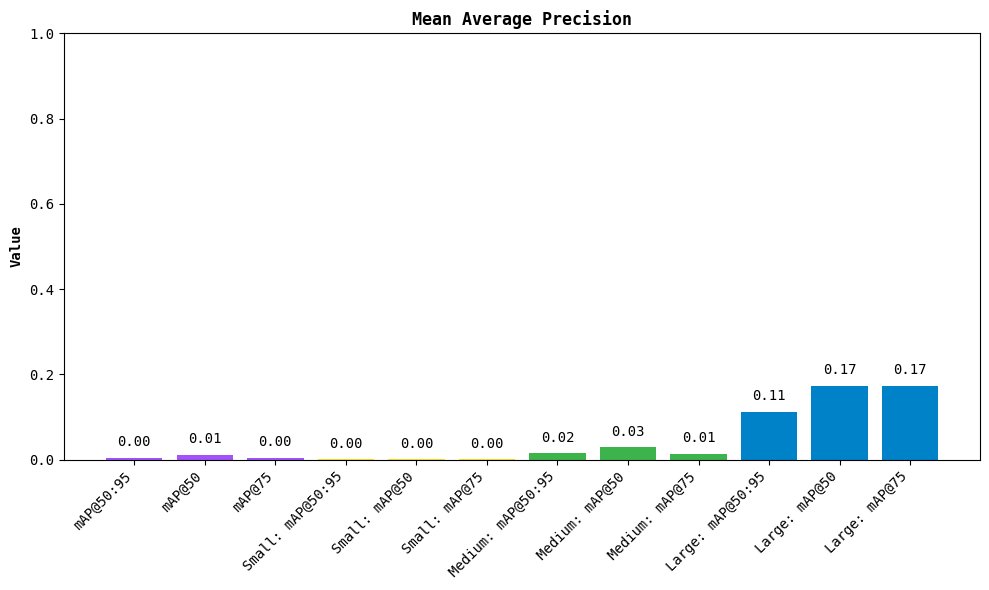

In [ ]:
map.plot()

Create a table for model comparison:

In [ ]:
# Set Table labels and data points
data = {
    "Method": ["YOLOv8n", "YOLOv8s", "YOLOv8m", "YOLOv11n", "YOLOv12n"],
    "Parameters (M)": [3.2, 11.2, 25.9, 4.1, 5.7],
    "FLOPs (B)": [8.7, 28.6, 78.9, 7.5, 10.2],
    "mAP (%)": [91.5, 94.2, 96.3, 95.0, 97.8],
    "FPS": [120, 85, 60, 130, 75]
}

In [ ]:
import pandas as pd

# Create the DataFrame
df = pd.DataFrame(data)

# Highlight maximum values in each column (for numeric data)
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Apply styling
styled_df = df.style.apply(highlight_max, subset=["mAP (%)", "FPS"])

# Display the table
styled_df

In [ ]:
# Save the table as a file
!pip install dataframe-image

import dataframe_image as dfi

# Save styled table as image
%cd {HOME}
dfi.export(styled_df, 'evaluation_results.png')

# Download file
from google.colab import files
files.download('evaluation_results.png')